# Predicting Depression

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv
/kaggle/input/pm-71399993-at-02-11-2025-23-06-44/__script__.py
/kaggle/input/pm-71399993-at-02-11-2025-23-06-44/__results__.html
/kaggle/input/pm-71399993-at-02-11-2025-23-06-44/input_requirements.txt
/kaggle/input/pm-71399993-at-02-11-2025-23-06-44/__script__.ipynb
/kaggle/input/pm-71399993-at-02-11-2025-23-06-44/__output__.json
/kaggle/input/pm-71399993-at-02-11-2025-23-06-44/custom.css


## Loading Dataset and Cleaning

In [2]:
df=pd.read_csv('/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv')

In [3]:
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


In [4]:
df.nunique()

Gender                                    2
Age                                      43
Work Pressure                             5
Job Satisfaction                          5
Sleep Duration                            4
Dietary Habits                            3
Have you ever had suicidal thoughts ?     2
Work Hours                               13
Financial Stress                          5
Family History of Mental Illness          2
Depression                                2
dtype: int64

First, we check for null rows where we find none.

In [5]:
# check for null rows
df.isnull().sum()

Gender                                   0
Age                                      0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Gender                                    object
Age                                        int64
Work Pressure                            float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Work Hours                                 int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object

## Explanatory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

We look at the distributions of the categorical variables and we find that they are quite balanced across the categories.

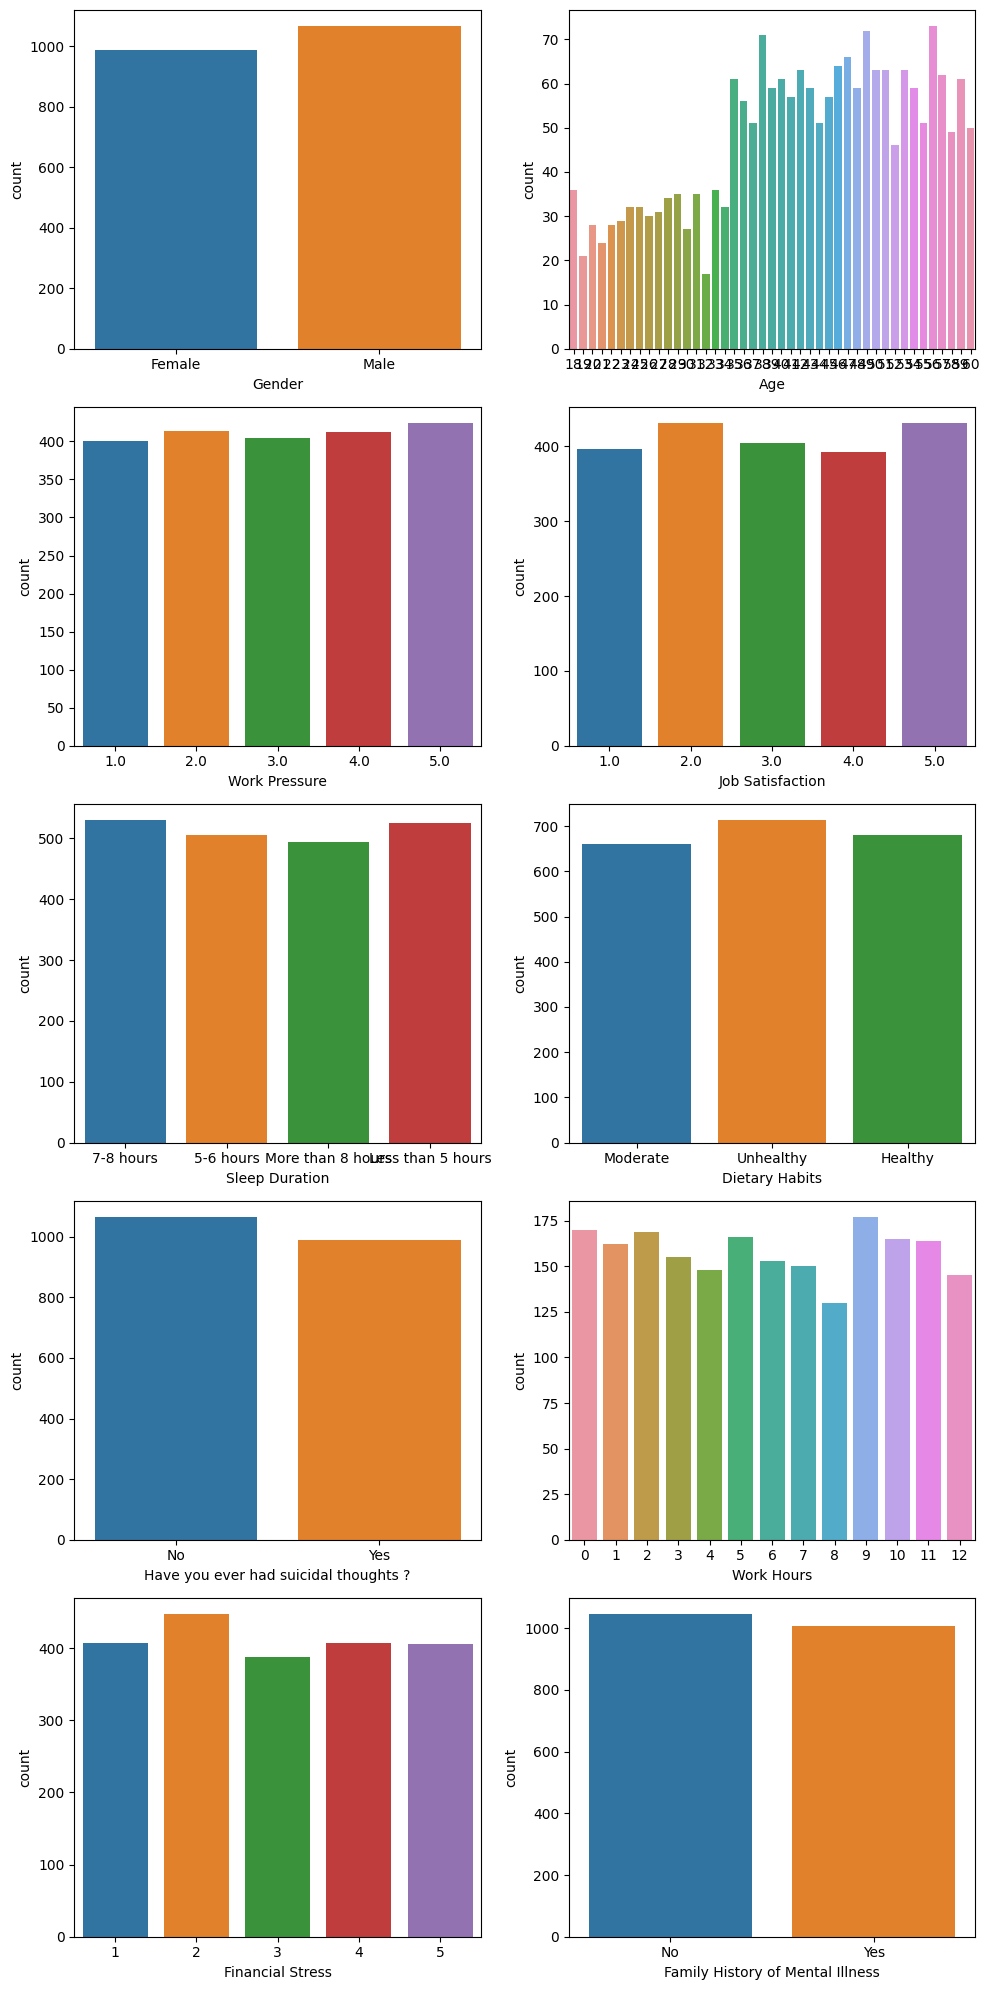

In [9]:
fig,ax=plt.subplots(5,2,figsize=(10,20))

j=0
for i,t in enumerate(df.columns[:-1]):
    
    ax[i//2][i%2]=sns.countplot(x=df[t],ax=ax[i//2][i%2])
    j+=1

fig.tight_layout()
plt.show()


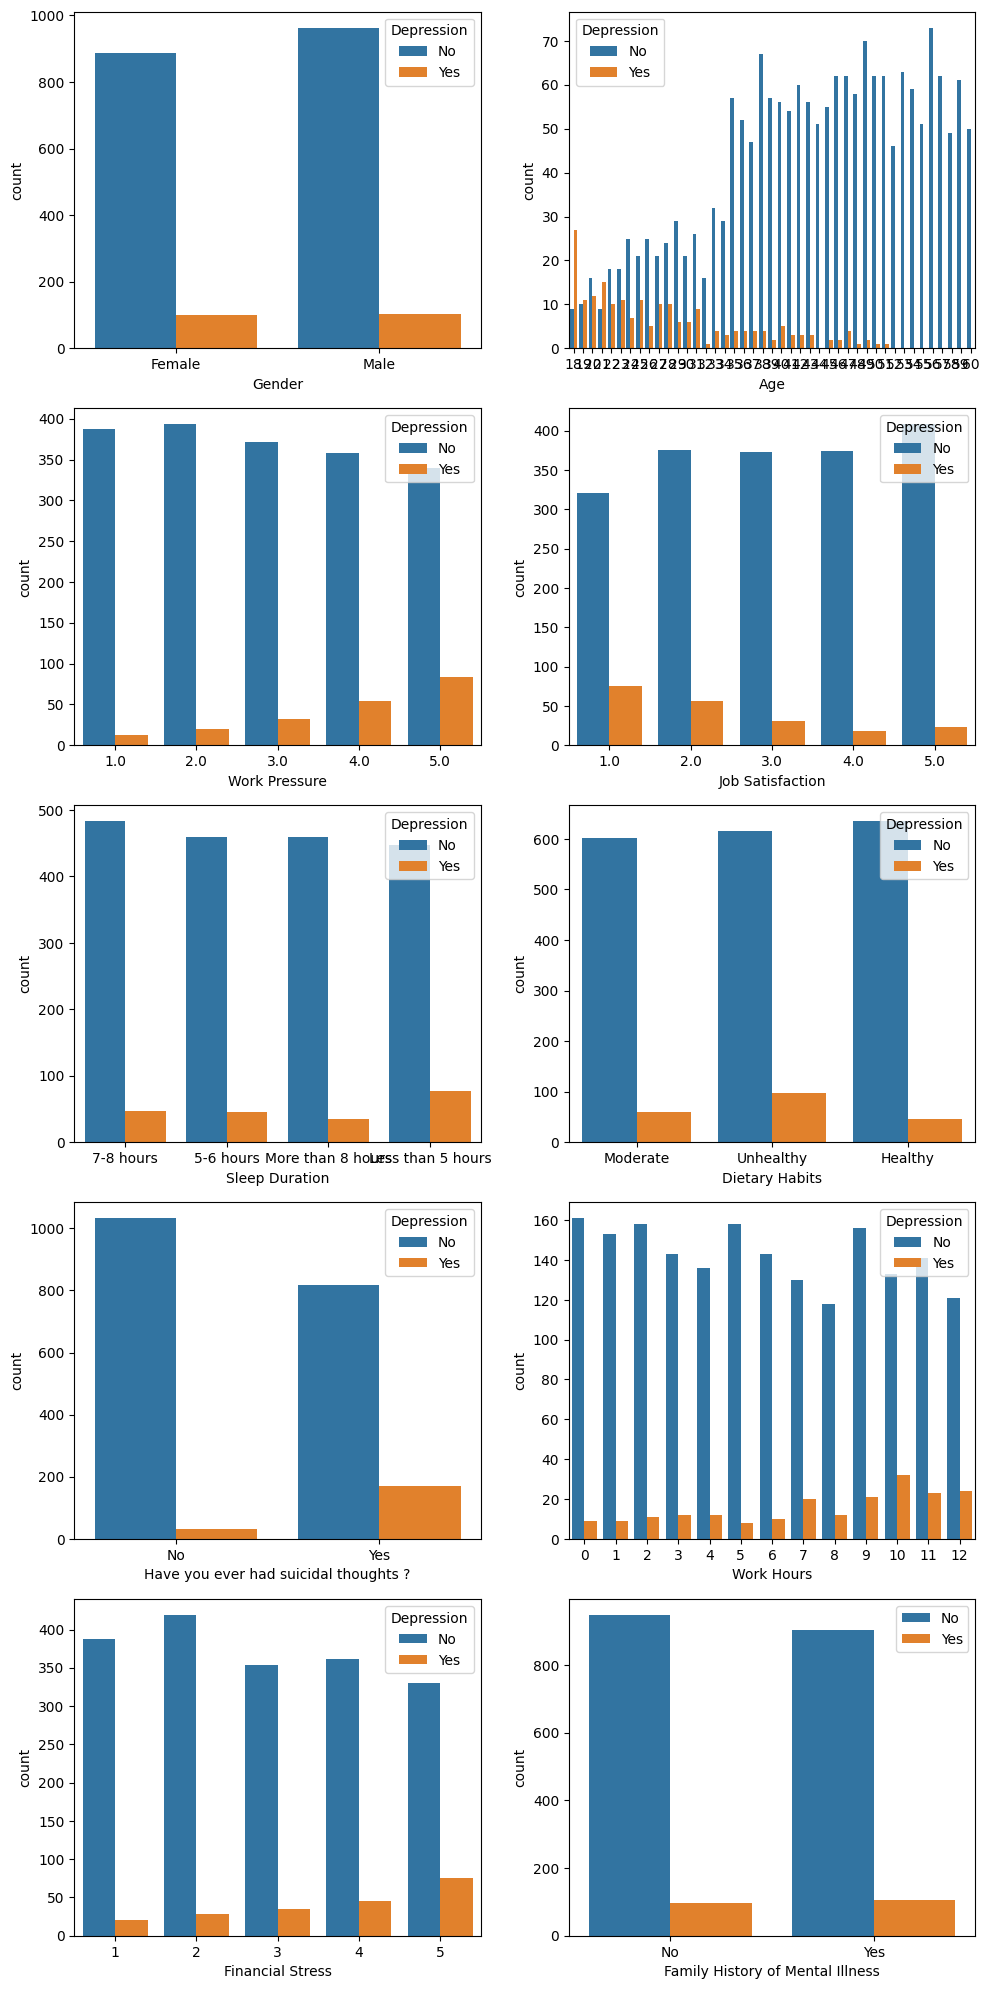

In [10]:
fig,ax=plt.subplots(5,2,figsize=(10,20))

j=0
for i,t in enumerate(df.columns[:-1]):
    
    ax[i//2][i%2]=sns.countplot(x=df[t],hue=df['Depression'],ax=ax[i//2][i%2])
    j+=1

fig.tight_layout()
plt.legend()
plt.show()

## Training Models 

### Logistic Regression
The first model we will look at is Logistic Regression. We will use the LogisticRegressionCV function. 'Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1.

For example, we have two classes Class 0 and Class 1 if the value of the logistic function for an input is greater than 0.5 (threshold value) then it belongs to Class 1 otherwise it belongs to Class 0'.

In this quick comparison, we note we do not stratify the dataset when splitting it.

In [11]:
from sklearn.linear_model import LogisticRegressionCV

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
for column in df:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [14]:
df

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,37,2.0,4.0,1,1,0,6,2,0,0
1,1,60,4.0,3.0,0,2,1,0,4,1,0
2,0,42,2.0,3.0,0,1,0,0,2,0,0
3,0,44,3.0,5.0,1,0,1,1,2,1,0
4,1,48,4.0,3.0,1,1,1,6,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2049,0,45,1.0,3.0,2,0,1,2,5,1,0
2050,1,25,1.0,5.0,0,0,1,12,3,1,0
2051,0,23,3.0,1.0,2,1,1,8,3,0,1
2052,0,24,1.0,4.0,2,1,1,4,4,0,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=df.drop(['Depression'],axis=1)
y=df['Depression']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

lbfgs didnt work

In [18]:
clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegressionCV(cv=5, random_state=0, solver='liblinear')

In [19]:
preds=clf.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
accuracy_score(y_test, preds)
f1_score(y_test,preds)

[[456   5]
 [  7  46]]


0.8846153846153846

We are going to try again with different scoring.

In [21]:
clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1')
clf.fit(X_train,y_train)

LogisticRegressionCV(cv=5, random_state=0, scoring='f1', solver='liblinear')

In [22]:
preds=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
accuracy_score(y_test, preds)
f1_score(y_test,preds)

[[456   5]
 [  7  46]]


0.8846153846153846

## Class balance
### Logistic Regression

In [23]:
# Split the dataset into train and test set and stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

In [24]:
# fit the model
clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1')
clf.fit(X_train,y_train)

LogisticRegressionCV(cv=5, random_state=0, scoring='f1', solver='liblinear')

In [25]:
# make predictions and report metrics
preds=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
accuracy_score(y_test, preds)
f1_score(y_test,preds)

[[455   8]
 [  3  48]]


0.897196261682243

In [26]:
clf = LogisticRegressionCV(cv=5, random_state=0,solver='liblinear',scoring='f1',penalty='l1',Cs=[0.01,0.1,1,5,10,20])
clf.fit(X_train,y_train)
preds=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
print('accuracy:',accuracy_score(y_test, preds),'f1:',f1_score(y_test,preds))

[[455   8]
 [  3  48]]
accuracy: 0.9785992217898832 f1: 0.897196261682243


### Random forests
Random forests involve fitting many decision trees and taking a majority vote from the trees to classify datapoins into 0 and 1. Decision trees introduce splits in the data to create a hyperplane to separate.
Below model uses default parameters which we will compare to hyperparameter tuning. 

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds=rf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, preds)
print(cm)
print('accuracy:',accuracy_score(y_test, preds),'f1:',f1_score(y_test,preds))

[[463   0]
 [ 24  27]]
accuracy: 0.953307392996109 f1: 0.6923076923076924


We tune hyperparameters by setting up a grid and using an inbuilt RandomizedSearchCV with an inbuilt stratified 5-fold cross validation scheme.

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [30]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e5de0d165f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e5de0d16c80>})

In [31]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 11, 'n_estimators': 307}


In [32]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy:',accuracy_score(y_test, y_pred),'f1:',f1_score(y_test,y_pred))

[[463   0]
 [ 24  27]]
accuracy: 0.953307392996109 f1: 0.6923076923076924


In [33]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42, oob_score=True, class_weight={0:1,1:100})

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 100},
                                                    oob_score=True,
                                                    random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e5de0d14f70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e5de0d17250>})

In [34]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 477}


In [35]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy:',accuracy_score(y_test, y_pred),'f1:',f1_score(y_test,y_pred))

[[463   0]
 [ 24  27]]
accuracy: 0.953307392996109 f1: 0.6923076923076924


### XGBoost

XGBoost is a powerful classifier that is good at classifying even with class imbalance.

In [36]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=1)
model.fit(X_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [37]:
xgbpreds=model.predict(X_test)

In [38]:
cm = confusion_matrix(y_test, xgbpreds)
print(cm)
print('accuracy:',accuracy_score(y_test, xgbpreds),'f1:',f1_score(y_test,xgbpreds))

[[461   2]
 [ 11  40]]
accuracy: 0.9747081712062257 f1: 0.8602150537634408


As with the random forest, we do some cross validation to find the best hyperparameters.

In [39]:
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    XGBClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to test
    cv=3,
    scoring="f1",
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [40]:
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best RMSE: {random_search.best_score_:.4f}")

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best RMSE: 0.8191


In [41]:
model = XGBClassifier(**random_search.best_params_, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [42]:
xgbpreds=model.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, xgbpreds)
print(cm)
print('accuracy:',accuracy_score(y_test, xgbpreds),'f1:',f1_score(y_test,xgbpreds))

[[461   2]
 [  8  43]]
accuracy: 0.980544747081712 f1: 0.8958333333333333


## Summary

In [44]:
from sklearn import metrics

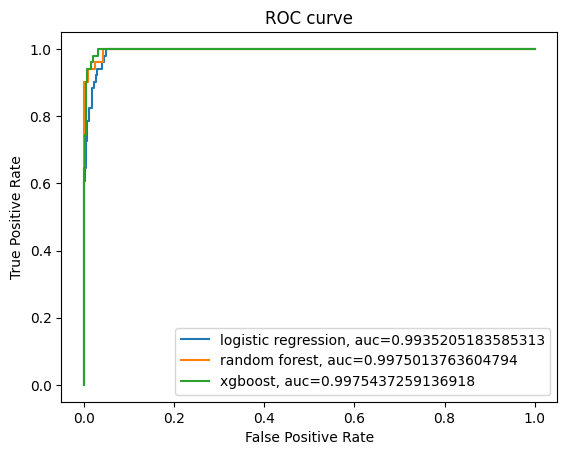

In [45]:
y_pred_proba = best_rf.predict_proba(X_test)[::,1]
clf_y_pred=clf.predict_proba(X_test)[::,1]
xgb_proba=model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
lfpr,ltpr,_= metrics.roc_curve(y_test,  clf_y_pred)
xfpr,xtpr,_= metrics.roc_curve(y_test,  xgb_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
clf_auc = metrics.roc_auc_score(y_test, clf_y_pred)
xgb_auc=metrics.roc_auc_score(y_test, xgb_proba)
plt.plot(fpr,tpr,label="logistic regression, auc="+str(auc))
plt.plot(lfpr,ltpr,label="random forest, auc="+str(clf_auc))
plt.plot(xfpr,xtpr,label="xgboost, auc="+str(xgb_auc))
plt.legend(loc=4)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

We note the class imbalance between instances of depression and not. The three models perform well when noting the AUC in the ROC graph. When considering f1 score, logistic regression and XGBoost do well. Overall, I would give the edge to logistic regression for its *interpretability* and *lack of tuning*.

Further work would include trying more models and maybe creating more artificial data points for class label '1'.

In [46]:
import catboost
from catboost import CatBoostRegressor